In [33]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math
import matplotlib as mpl

In [2]:
with open(r'../../results/outcomes/Cost/Analyze result/ npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

,Strategy,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,total_cost_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br,total_cost_br
0,S1,1250000.0,0.000000e+00,1520000.0,2770000.0,6.796013e+05,0.000000e+00,1520000.0,2200000.0
1,S2,1250000.0,0.000000e+00,1520000.0,2770000.0,5.560000e+06,8.567154e+05,2290000.0,8710000.0
2,S3,1250000.0,0.000000e+00,1520000.0,2770000.0,1.330000e+07,2.540000e+06,3850000.0,19700000.0
3,S4,13000000.0,8.567154e+05,2290000.0,16100000.0,6.796013e+05,0.000000e+00,1520000.0,2200000.0
4,S5,1250000.0,0.000000e+00,3850000.0,5100000.0,1.330000e+07,2.540000e+06,1520000.0,17400000.0
5,S6,13300000.0,8.567154e+05,2290000.0,16400000.0,1.770000e+06,8.567154e+05,2290000.0,4920000.0
6,S7,13000000.0,8.567154e+05,2290000.0,16100000.0,5.560000e+06,8.567154e+05,2290000.0,8710000.0
7,S8,13300000.0,8.567154e+05,2290000.0,16400000.0,1.770000e+06,8.567154e+05,2290000.0,4920000.0
8,S9,13000000.0,8.567154e+05,2290000.0,16100000.0,5.560000e+06,8.567154e+05,2290000.0,8710000.0
9,S10,31800000.0,2.540000e+06,3850000.0,38200000.0,4.380000e+06,2.540000e+06,3850000.0,10800000.0


In [3]:
df_cost = df_cost.set_index('Strategy')

In [4]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br'], axis=1)

In [5]:
df_cost

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1250000.0,0.000000e+00,1520000.0,6.796013e+05,0.000000e+00,1520000.0
S2,1250000.0,0.000000e+00,1520000.0,5.560000e+06,8.567154e+05,2290000.0
S3,1250000.0,0.000000e+00,1520000.0,1.330000e+07,2.540000e+06,3850000.0
S4,13000000.0,8.567154e+05,2290000.0,6.796013e+05,0.000000e+00,1520000.0
S5,1250000.0,0.000000e+00,3850000.0,1.330000e+07,2.540000e+06,1520000.0
S6,13300000.0,8.567154e+05,2290000.0,1.770000e+06,8.567154e+05,2290000.0
S7,13000000.0,8.567154e+05,2290000.0,5.560000e+06,8.567154e+05,2290000.0
S8,13300000.0,8.567154e+05,2290000.0,1.770000e+06,8.567154e+05,2290000.0
S9,13000000.0,8.567154e+05,2290000.0,5.560000e+06,8.567154e+05,2290000.0


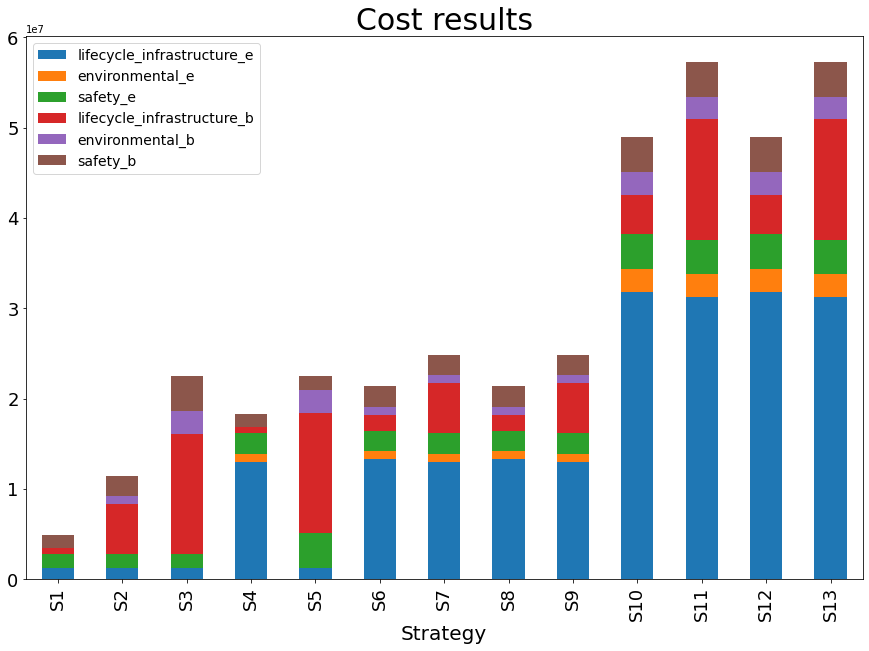

In [6]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

In [7]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

,Strategy,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
0,INN,0.000000,1.190000e+09,0.000000,2620000.0
1,INC,0.000000,1.190000e+09,1020.823948,1910000.0
2,INA,0.000000,1.190000e+09,2220.392903,1250000.0
3,ICN,1020.823948,8.650000e+08,0.000000,2620000.0
4,IAN,2220.392903,5.670000e+08,0.000000,2620000.0
5,JCC,1020.823948,8.650000e+08,1020.823948,1910000.0
6,ICC,1020.823948,8.650000e+08,1020.823948,1910000.0
7,JAA,2220.392903,5.670000e+08,2220.392903,1250000.0
8,IAA,2220.392903,5.670000e+08,2220.392903,1250000.0


In [8]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [9]:
df_loss_benefit

,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
Strategy,,,,
INN,0.000000,1.190000e+09,0.000000,2620000.0
INC,0.000000,1.190000e+09,1020.823948,1910000.0
INA,0.000000,1.190000e+09,2220.392903,1250000.0
ICN,1020.823948,8.650000e+08,0.000000,2620000.0
IAN,2220.392903,5.670000e+08,0.000000,2620000.0
JCC,1020.823948,8.650000e+08,1020.823948,1910000.0
ICC,1020.823948,8.650000e+08,1020.823948,1910000.0
JAA,2220.392903,5.670000e+08,2220.392903,1250000.0
IAA,2220.392903,5.670000e+08,2220.392903,1250000.0


In [10]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [11]:
df_loss

,economic_losses_el,economic_loss_br
Strategy,,
INN,1.190000e+09,2620000.0
INC,1.190000e+09,1910000.0
INA,1.190000e+09,1250000.0
ICN,8.650000e+08,2620000.0
IAN,5.670000e+08,2620000.0
JCC,8.650000e+08,1910000.0
ICC,8.650000e+08,1910000.0
JAA,5.670000e+08,1250000.0
IAA,5.670000e+08,1250000.0


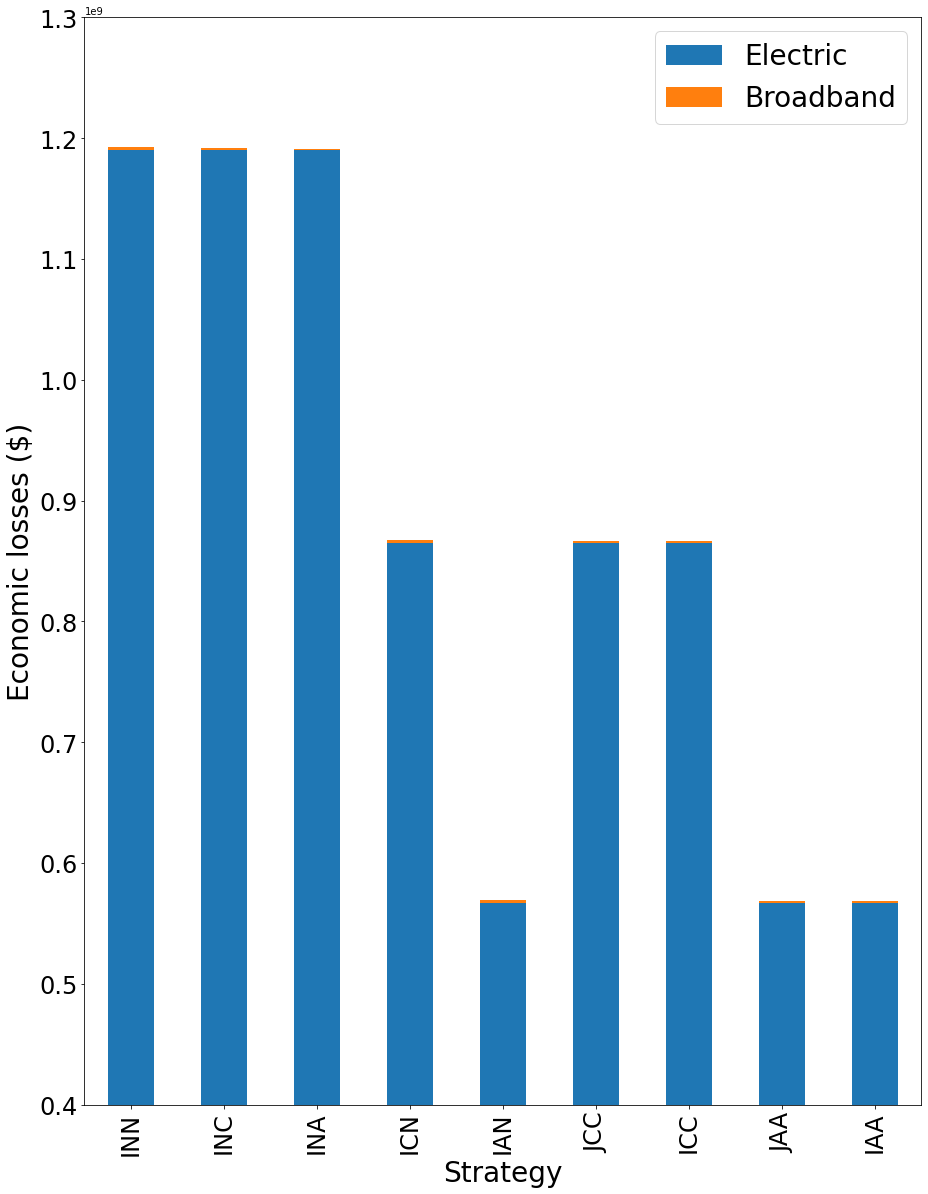

In [12]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
plt.ylim([400000000, 1300000000])
plt.grid()
#plt.title("loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=28)
plt.ylabel('Economic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-loss-E-vs-B.png', dpi=300)

In [13]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)

In [14]:
df_benefit

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
INN,0.000000,0.000000
INC,0.000000,1020.823948
INA,0.000000,2220.392903
ICN,1020.823948,0.000000
IAN,2220.392903,0.000000
JCC,1020.823948,1020.823948
ICC,1020.823948,1020.823948
JAA,2220.392903,2220.392903
IAA,2220.392903,2220.392903


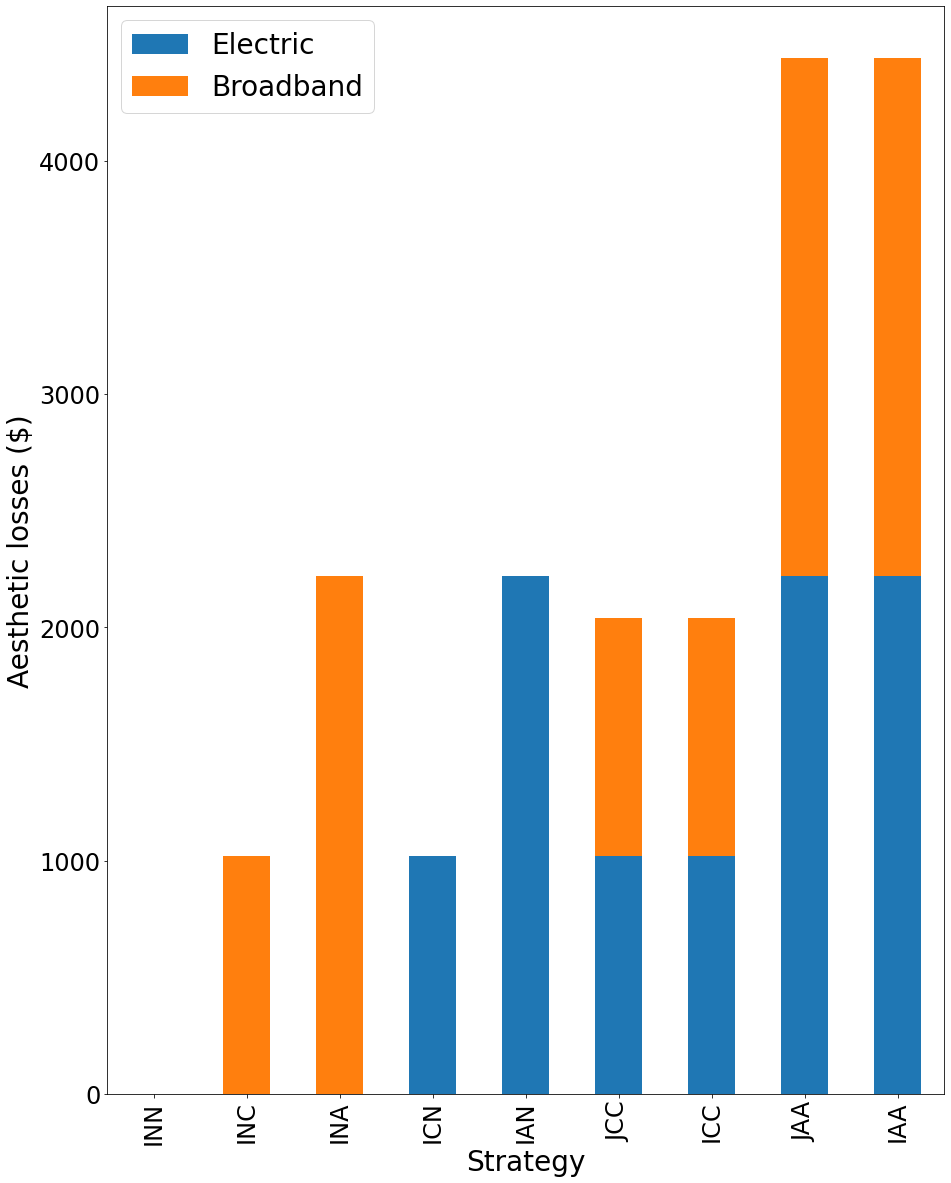

In [15]:
# plotting benefit results
#color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([0, 50000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=28)
plt.ylabel('Aesthetic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300)
color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']


In [16]:
with open(r'../../results/outcomes/npv_cost_loss_benefit.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,1930000.0,0.000000e+00,3040000.0,4970000.0,0.0,1.190000e+09,-1.190000e+09
1,INC,6810000.0,8.567154e+05,3810000.0,11500000.0,1020.0,1.190000e+09,-1.200000e+09
2,INA,14600000.0,2.540000e+06,5370000.0,22500000.0,2220.0,1.190000e+09,-1.210000e+09
3,ICN,13700000.0,8.567154e+05,3810000.0,18400000.0,1020.0,8.680000e+08,-8.860000e+08
4,IAN,14600000.0,2.540000e+06,5370000.0,22500000.0,2220.0,5.700000e+08,-5.930000e+08
5,JCC,15100000.0,1.713431e+06,4580000.0,21400000.0,2040.0,8.670000e+08,-8.880000e+08
6,ICC,18600000.0,1.713431e+06,4580000.0,24900000.0,2040.0,8.670000e+08,-8.920000e+08
7,JAA,36200000.0,5.080000e+06,7700000.0,49000000.0,4440.0,5.680000e+08,-6.170000e+08
8,IAA,44500000.0,5.080000e+06,7700000.0,57300000.0,4440.0,5.680000e+08,-6.250000e+08


In [17]:
#df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [18]:
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,1930000.0,0.000000e+00,3040000.0,4970000.0,0.0,1.190000e+09,-1.190000e+09
1,INC,6810000.0,8.567154e+05,3810000.0,11500000.0,1020.0,1.190000e+09,-1.200000e+09
2,INA,14600000.0,2.540000e+06,5370000.0,22500000.0,2220.0,1.190000e+09,-1.210000e+09
3,ICN,13700000.0,8.567154e+05,3810000.0,18400000.0,1020.0,8.680000e+08,-8.860000e+08
4,IAN,14600000.0,2.540000e+06,5370000.0,22500000.0,2220.0,5.700000e+08,-5.930000e+08
5,JCC,15100000.0,1.713431e+06,4580000.0,21400000.0,2040.0,8.670000e+08,-8.880000e+08
6,ICC,18600000.0,1.713431e+06,4580000.0,24900000.0,2040.0,8.670000e+08,-8.920000e+08
7,JAA,36200000.0,5.080000e+06,7700000.0,49000000.0,4440.0,5.680000e+08,-6.170000e+08
8,IAA,44500000.0,5.080000e+06,7700000.0,57300000.0,4440.0,5.680000e+08,-6.250000e+08


In [19]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [20]:
df_npv_net_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [21]:
df_npv_net_benefit_new=df_npv_net_benefit.transpose()

In [22]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,JCC,ICC,JAA,IAA
net_benefit,-1.190000e+09,-1.200000e+09,-1.210000e+09,-886000000.0,-593000000.0,-888000000.0,-892000000.0,-617000000.0,-625000000.0


In [23]:
#ax = df.plot.bar(rot=0, color={'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6', 'IAN': '#6A3D9A', 'ICC': '#A6CEE3', 'IAA': '#1F78B4', 'JCC': '#B2DF8A', 'JAA': '#33A02C'})

In [24]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,JCC,ICC,JAA,IAA
net_benefit,-1.190000e+09,-1.200000e+09,-1.210000e+09,-886000000.0,-593000000.0,-888000000.0,-892000000.0,-617000000.0,-625000000.0


In [25]:
df_npv_net_benefit=df_npv_net_benefit.reset_index()

In [26]:
df_npv_net_benefit

,Strategy,net_benefit
0,INN,-1.190000e+09
1,INC,-1.200000e+09
2,INA,-1.210000e+09
3,ICN,-8.860000e+08
4,IAN,-5.930000e+08
5,JCC,-8.880000e+08
6,ICC,-8.920000e+08
7,JAA,-6.170000e+08
8,IAA,-6.250000e+08


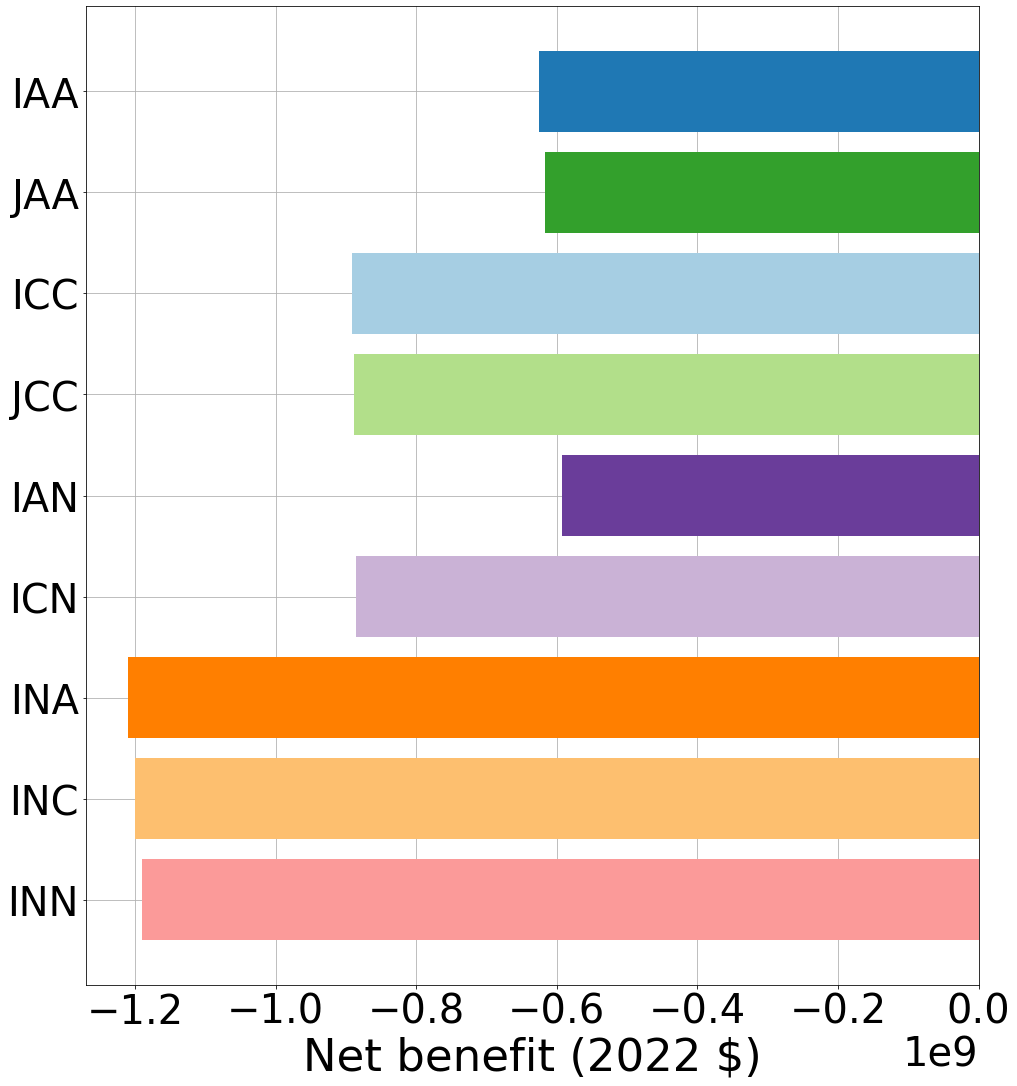

In [27]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit.loc[i,"net_benefit"],color=row, zorder=3)
plt.xlabel ('Net benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.yticks(df_npv_net_benefit.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid()
plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=400, bbox_inches='tight')
plt.show()

In [29]:
# plotting graph (new version)
ax = df_npv_net_benefit.T.plot(ylabel='Net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=300)
plt.show()

TypeError: no numeric data to plot

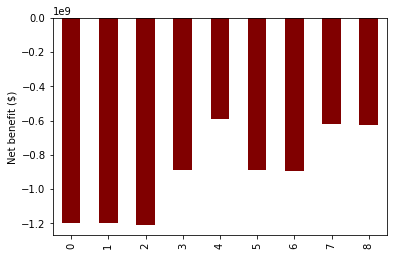

In [29]:
# plotting graph
df_npv_net_benefit.plot(ylabel='Net benefit ($)', kind="bar", color='maroon', legend=False)
plt.savefig(r'../../figures/npv.png', dpi=300, bbox_inches='tight')

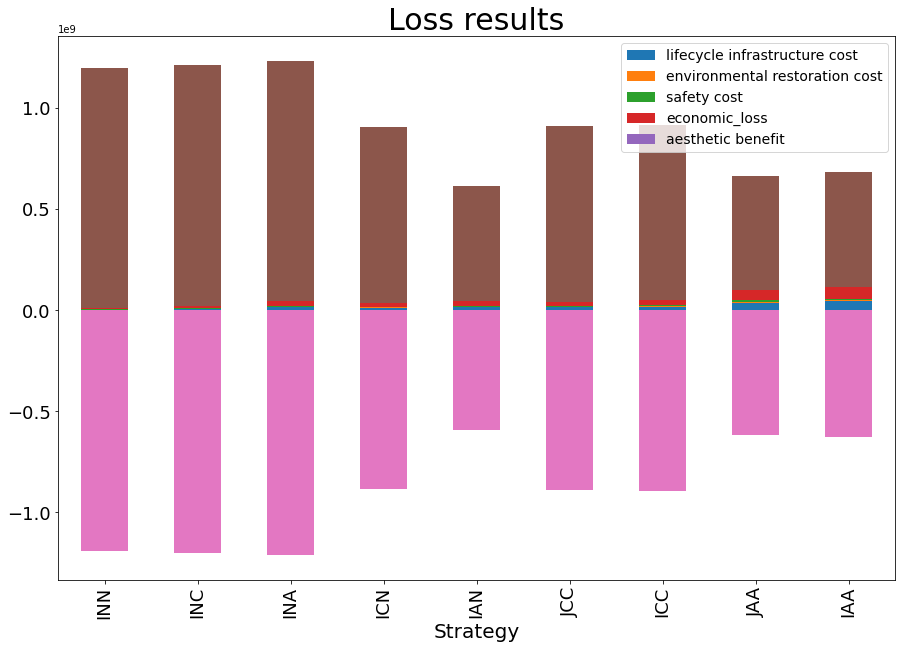

In [28]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png', dpi=300)

In [29]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
Strategy,,,,,,,
INN,1930000.0,0.000000e+00,3040000.0,4970000.0,0.0,1.190000e+09,-1.190000e+09
INC,6810000.0,8.567154e+05,3810000.0,11500000.0,1020.0,1.190000e+09,-1.200000e+09
INA,14600000.0,2.540000e+06,5370000.0,22500000.0,2220.0,1.190000e+09,-1.210000e+09
ICN,13700000.0,8.567154e+05,3810000.0,18400000.0,1020.0,8.680000e+08,-8.860000e+08
IAN,14600000.0,2.540000e+06,5370000.0,22500000.0,2220.0,5.700000e+08,-5.930000e+08
JCC,15100000.0,1.713431e+06,4580000.0,21400000.0,2040.0,8.670000e+08,-8.880000e+08
ICC,18600000.0,1.713431e+06,4580000.0,24900000.0,2040.0,8.670000e+08,-8.920000e+08
JAA,36200000.0,5.080000e+06,7700000.0,49000000.0,4440.0,5.680000e+08,-6.170000e+08
IAA,44500000.0,5.080000e+06,7700000.0,57300000.0,4440.0,5.680000e+08,-6.250000e+08


In [30]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','economic_losses', 'aesthetic_benefit'], axis=1)

In [31]:
df_npv_cost

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
INN,1930000.0,0.000000e+00,3040000.0
INC,6810000.0,8.567154e+05,3810000.0
INA,14600000.0,2.540000e+06,5370000.0
ICN,13700000.0,8.567154e+05,3810000.0
IAN,14600000.0,2.540000e+06,5370000.0
JCC,15100000.0,1.713431e+06,4580000.0
ICC,18600000.0,1.713431e+06,4580000.0
JAA,36200000.0,5.080000e+06,7700000.0
IAA,44500000.0,5.080000e+06,7700000.0


In [40]:
df_npv_cost=df_npv_cost.reset_index()

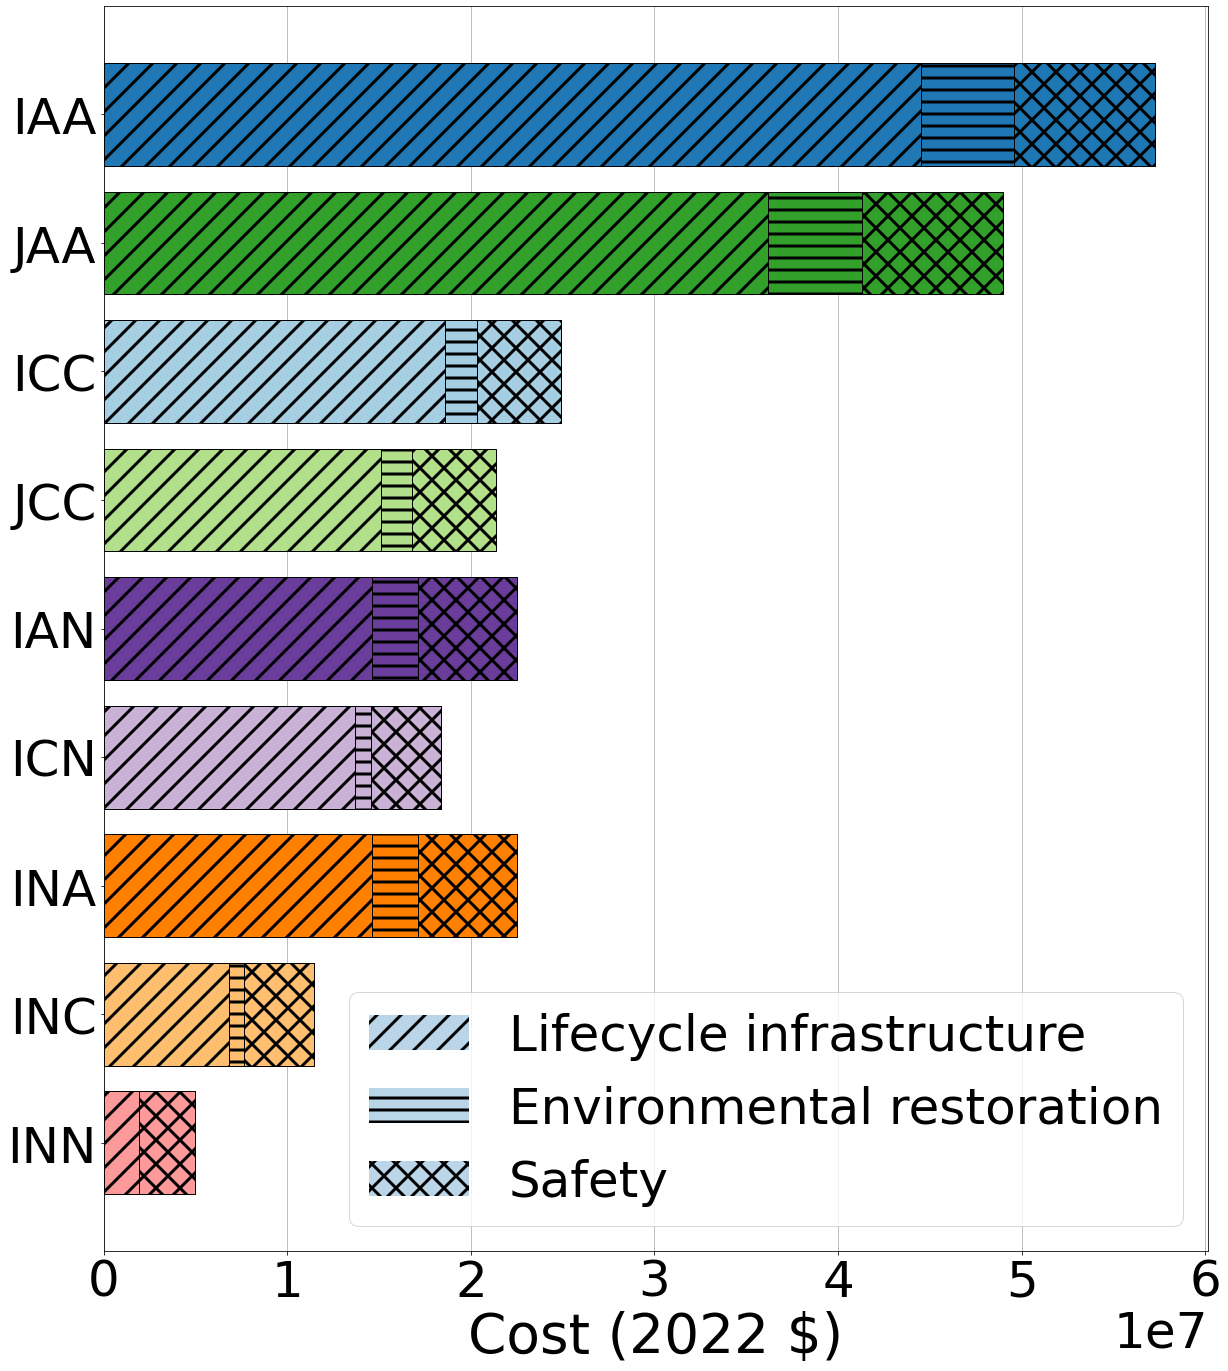

In [86]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)
x= df_npv_cost.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']

#mpl.rc('hatch', color='k', linewidth=1.5)
mpl.rcParams['hatch.linewidth'] = 3.0 

b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

a_val = 0.3



circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Cost (2022 $)", fontsize=55)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

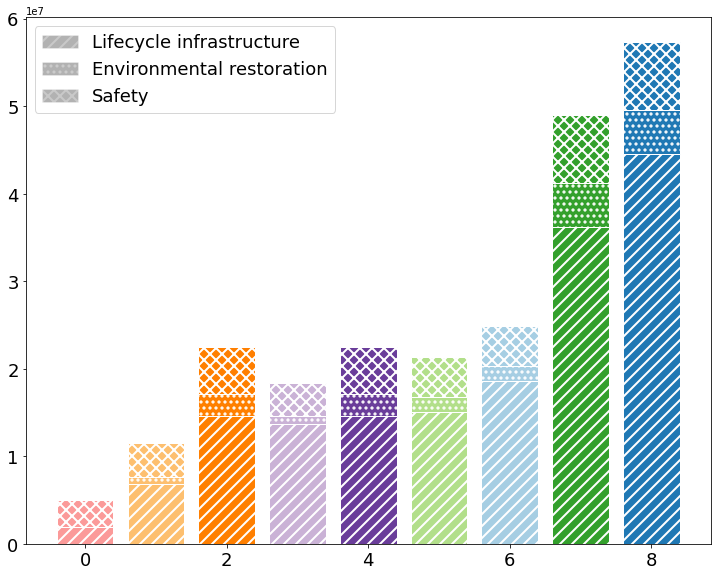

In [43]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 8)

x= df_npv_cost.index
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White', hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',edgecolor='White', alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)
plt.show()

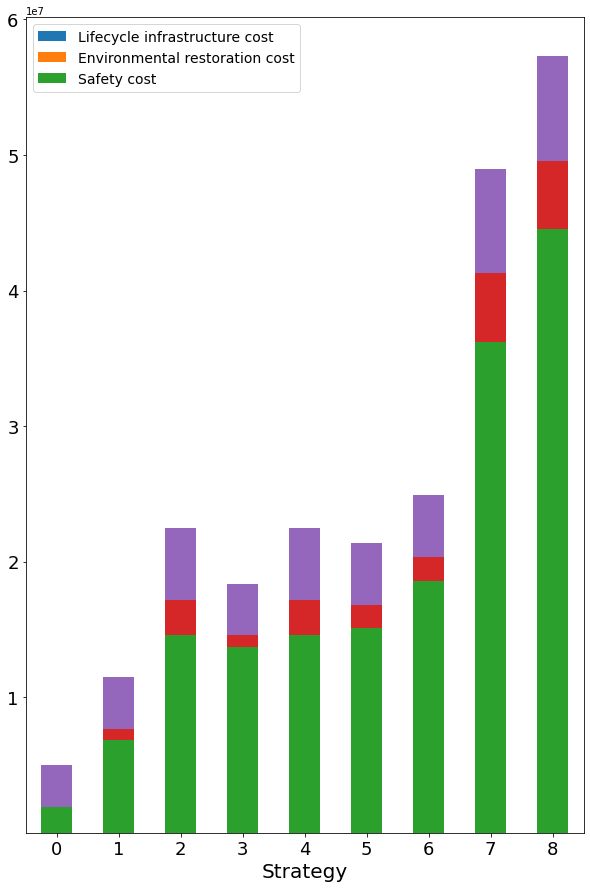

In [54]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 0)
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)

In [55]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [56]:
df_npv_loss

,economic_losses
Strategy,
INN,1.190000e+09
INC,1.190000e+09
INA,1.190000e+09
ICN,8.680000e+08
IAN,5.700000e+08
JCC,8.670000e+08
ICC,8.670000e+08
JAA,5.680000e+08
IAA,5.680000e+08


In [57]:
df_npv_loss=df_npv_loss.reset_index()

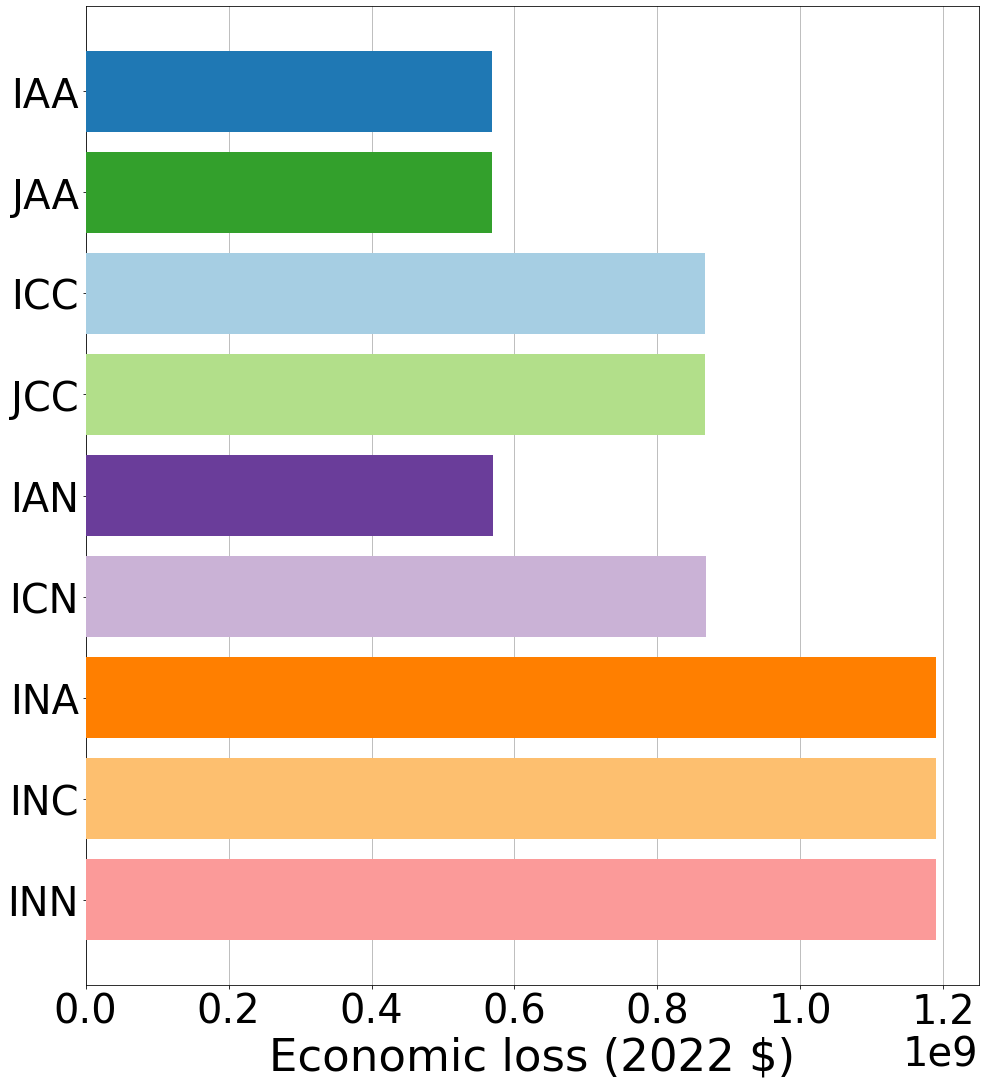

In [58]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss.loc[i,"economic_losses"],color=row, zorder=3)
plt.xlabel ('Economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

In [59]:
# plotting loss results integerated for broadband and electric
ax=df_npv_loss.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
ax.set_xticks([])
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

TypeError: no numeric data to plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

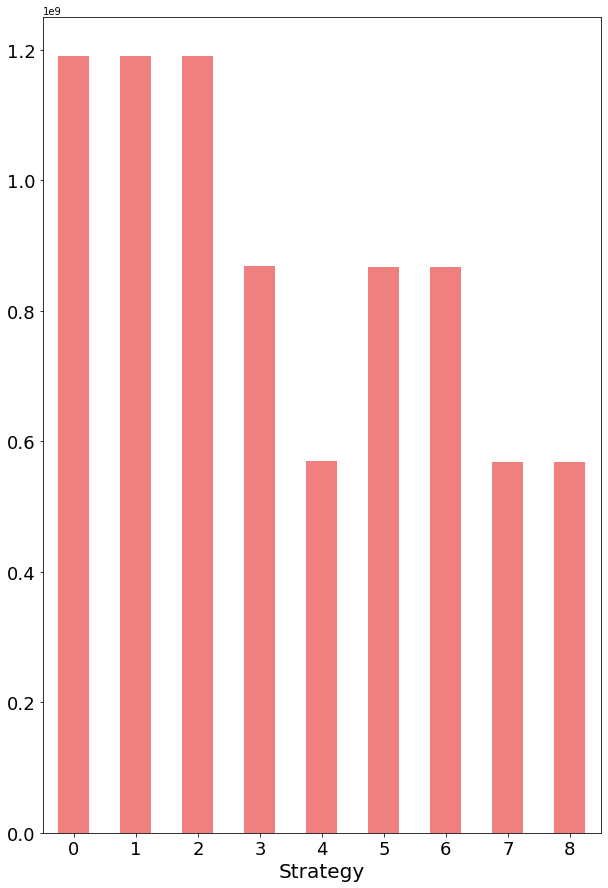

In [60]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

In [61]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

In [62]:
df_npv_benefit

,aesthetic_benefit
Strategy,
INN,0.0
INC,1020.0
INA,2220.0
ICN,1020.0
IAN,2220.0
JCC,2040.0
ICC,2040.0
JAA,4440.0
IAA,4440.0


In [63]:
df_npv_benefit=df_npv_benefit.reset_index()

In [64]:
df_npv_benefit

,Strategy,aesthetic_benefit
0,INN,0.0
1,INC,1020.0
2,INA,2220.0
3,ICN,1020.0
4,IAN,2220.0
5,JCC,2040.0
6,ICC,2040.0
7,JAA,4440.0
8,IAA,4440.0


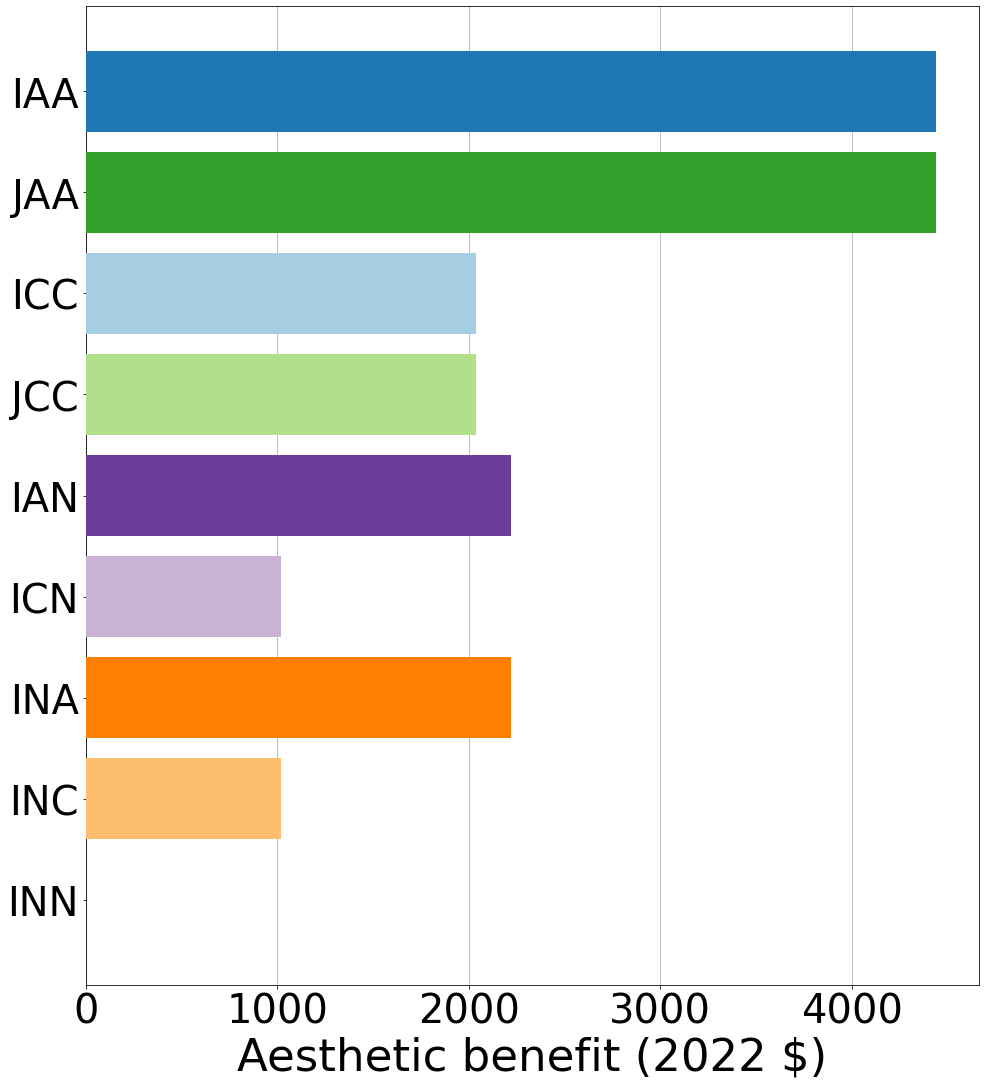

In [65]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

In [66]:
# plotting benefit results integerated for broadband and electric
ax=df_npv_benefit.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
ax.set_xticks([])
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

TypeError: no numeric data to plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

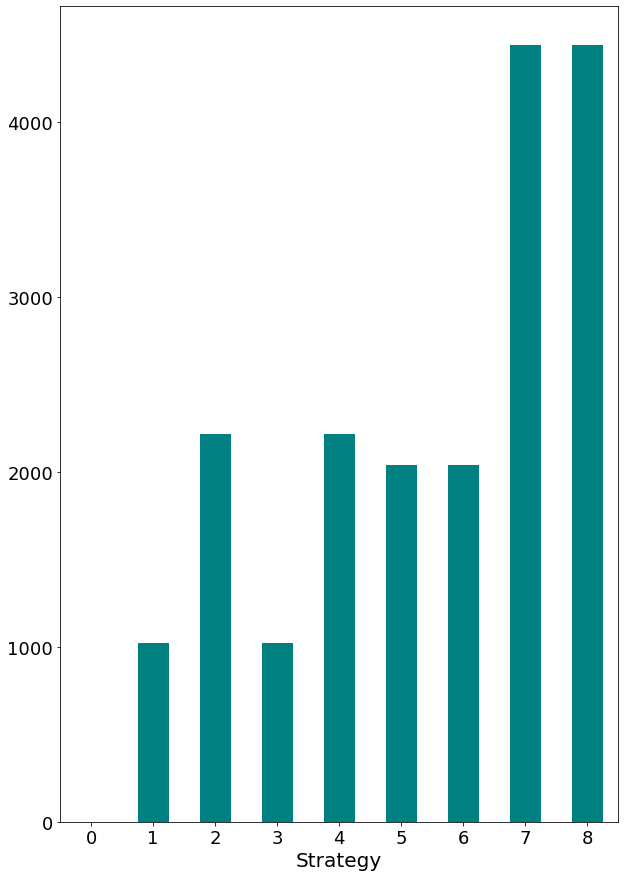

In [67]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

In [68]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,INC,4880000.0,857000.0,770000.0,6530000.0,1020.0,0.0,-10000000.0
2,INA,12700000.0,2540000.0,2330000.0,17500000.0,2220.0,0.0,-20000000.0
3,ICN,11800000.0,857000.0,770000.0,13400000.0,1020.0,-322000000.0,304000000.0
4,IAN,12700000.0,2540000.0,2330000.0,17500000.0,2220.0,-620000000.0,597000000.0
5,JCC,13200000.0,1710000.0,1540000.0,16400000.0,2040.0,-323000000.0,302000000.0
6,ICC,16700000.0,1710000.0,1540000.0,19900000.0,2040.0,-323000000.0,298000000.0
7,JAA,34300000.0,5080000.0,4660000.0,44000000.0,4440.0,-622000000.0,573000000.0
8,IAA,42600000.0,5080000.0,4660000.0,52300000.0,4440.0,-622000000.0,565000000.0


In [69]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

In [70]:
df_npv_net_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [71]:
df_npv_net_benefit_relative

,net_benefit
Strategy,
INN,0.0
INC,-10000000.0
INA,-20000000.0
ICN,304000000.0
IAN,597000000.0
JCC,302000000.0
ICC,298000000.0
JAA,573000000.0
IAA,565000000.0


In [72]:
df_npv_net_benefit_relative=df_npv_net_benefit_relative.reset_index()

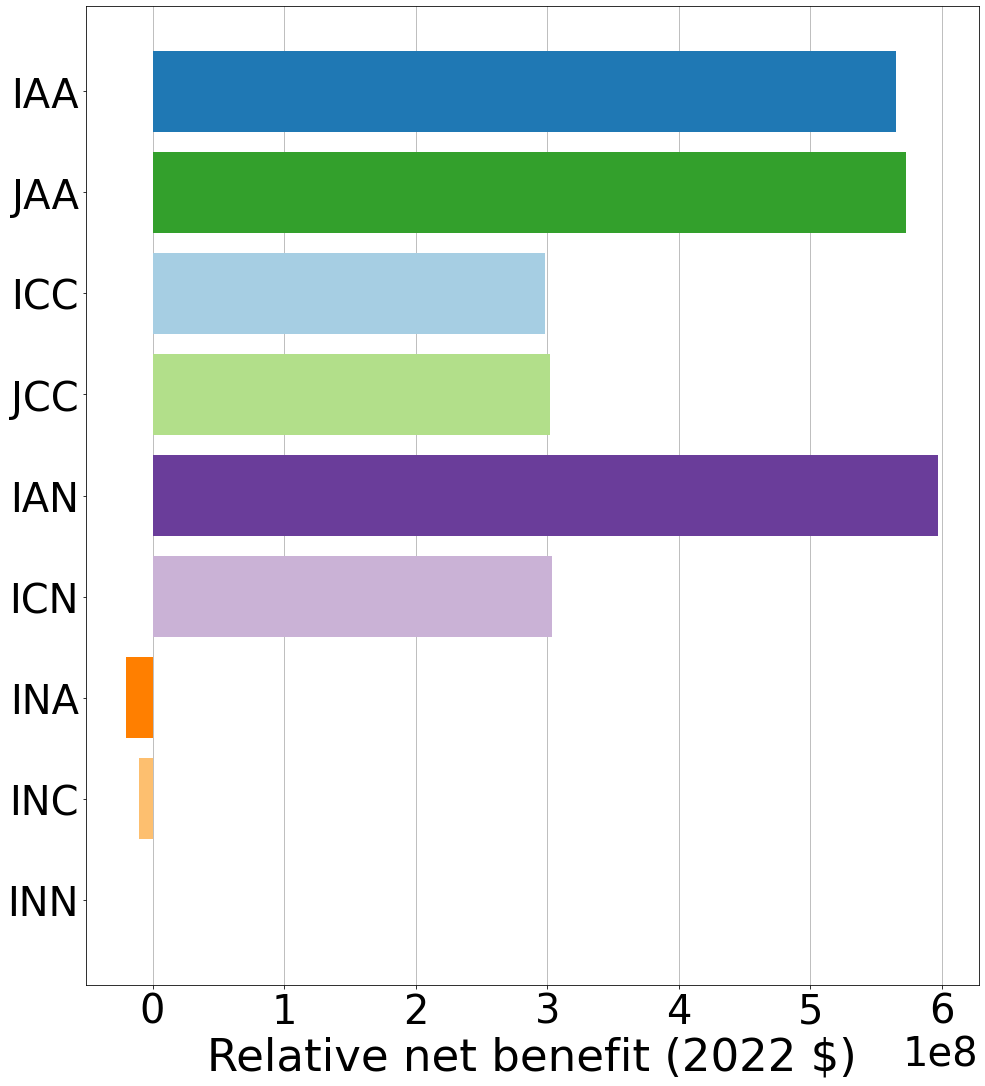

In [73]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit_relative.loc[i,"net_benefit"],color=row, zorder=3)
plt.xlabel ('Relative net benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_net_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [74]:
# plotting graph (Ver 02)
ax = df_npv_net_benefit_relative.T.plot(ylabel='Relative net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
ax.set_xticks([])
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=300)
plt.show()

TypeError: no numeric data to plot

<AxesSubplot:ylabel='Relative net benefit ($)'>

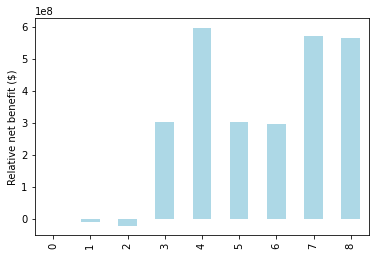

In [75]:
# plotting graph
df_npv_net_benefit_relative.plot(ylabel='Relative net benefit ($)', kind="bar", color="lightblue", legend=False)
#plt.savefig(r'../../figures/relative-npv.png', dpi=300, bbox_inches='tight')

In [76]:
df_npv_cost_loss_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['net_benefit', 'total_cost'], axis=1)

In [77]:
df_npv_cost_loss_benefit_relative

,lifecycle_infrastructure,environmental_restoration,safety,aesthetic_benefit,economic_losses
Strategy,,,,,
INN,0.0,0.0,0.0,0.0,0.0
INC,4880000.0,857000.0,770000.0,1020.0,0.0
INA,12700000.0,2540000.0,2330000.0,2220.0,0.0
ICN,11800000.0,857000.0,770000.0,1020.0,-322000000.0
IAN,12700000.0,2540000.0,2330000.0,2220.0,-620000000.0
JCC,13200000.0,1710000.0,1540000.0,2040.0,-323000000.0
ICC,16700000.0,1710000.0,1540000.0,2040.0,-323000000.0
JAA,34300000.0,5080000.0,4660000.0,4440.0,-622000000.0
IAA,42600000.0,5080000.0,4660000.0,4440.0,-622000000.0


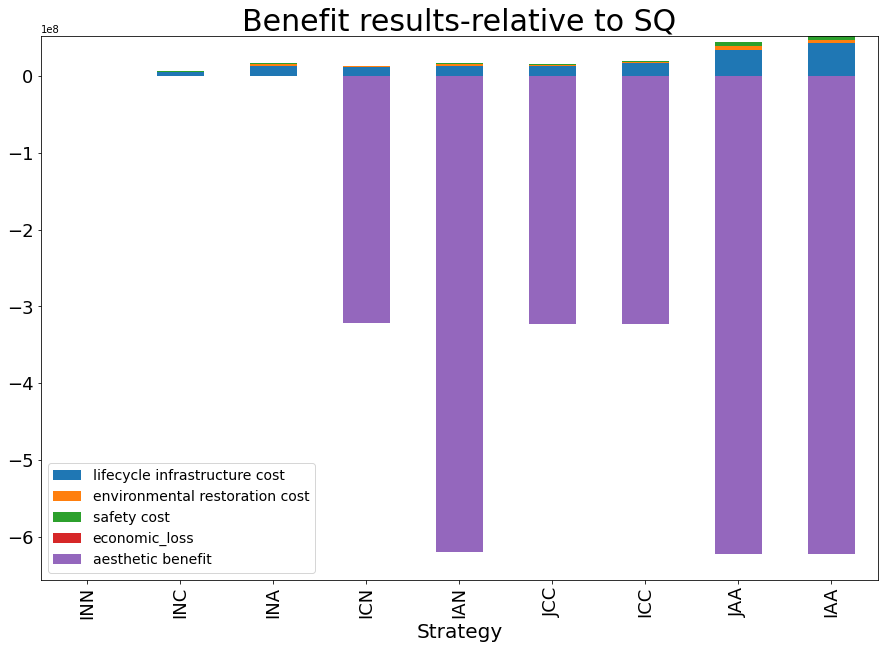

In [78]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png', dpi=300)

In [79]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['economic_losses', 'aesthetic_benefit'], axis=1)

In [80]:
df_npv_cost_relative

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
INN,0.0,0.0,0.0
INC,4880000.0,857000.0,770000.0
INA,12700000.0,2540000.0,2330000.0
ICN,11800000.0,857000.0,770000.0
IAN,12700000.0,2540000.0,2330000.0
JCC,13200000.0,1710000.0,1540000.0
ICC,16700000.0,1710000.0,1540000.0
JAA,34300000.0,5080000.0,4660000.0
IAA,42600000.0,5080000.0,4660000.0


In [81]:
df_npv_cost_relative=df_npv_cost_relative.reset_index()

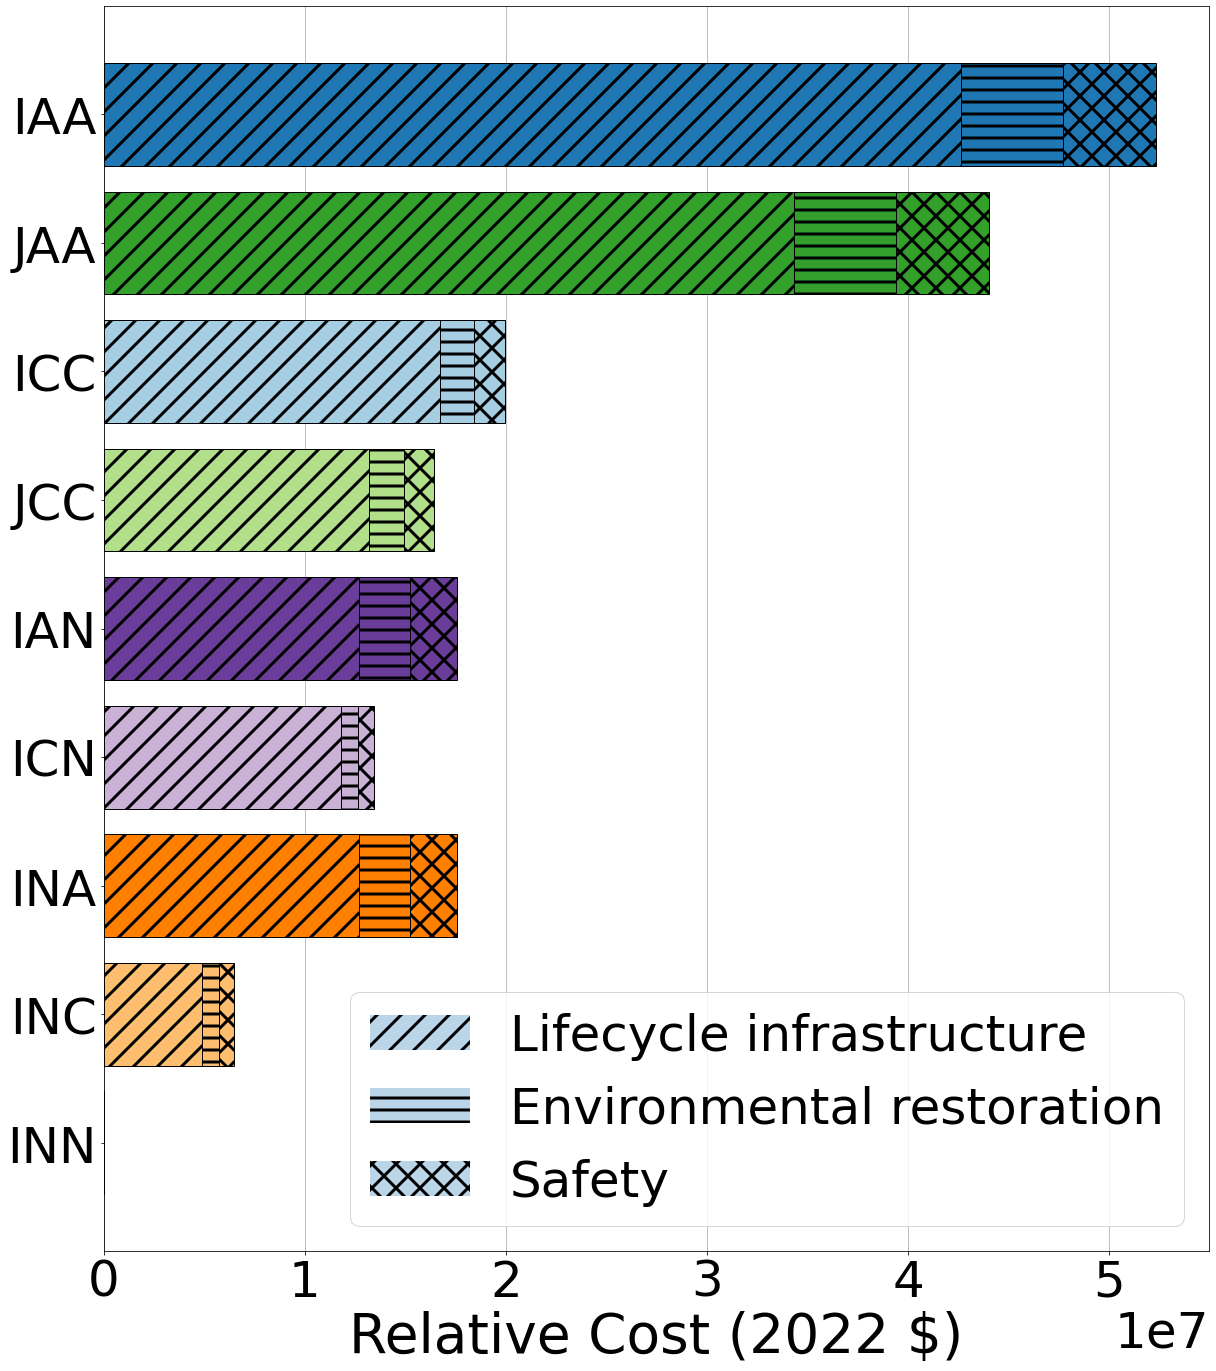

In [90]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)

x= df_npv_cost_relative.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']

mpl.rcParams['hatch.linewidth'] = 3.0 


b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black',hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

a_val = 0.3

circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()
plt.xlabel("Relative Cost (2022 $)", fontsize=55)

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=400, bbox_inches='tight')


#plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

plt.show()

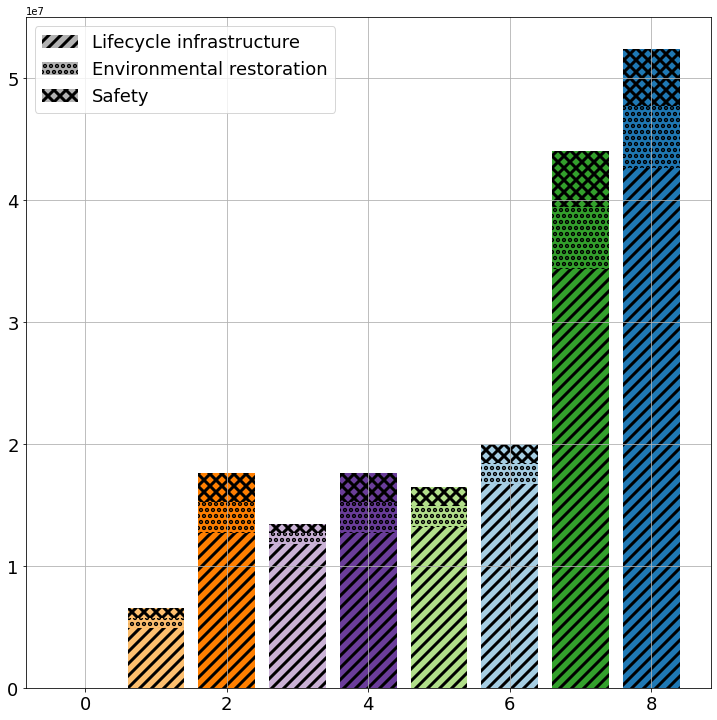

In [89]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 10)

x= df_npv_cost_relative.index
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.show()

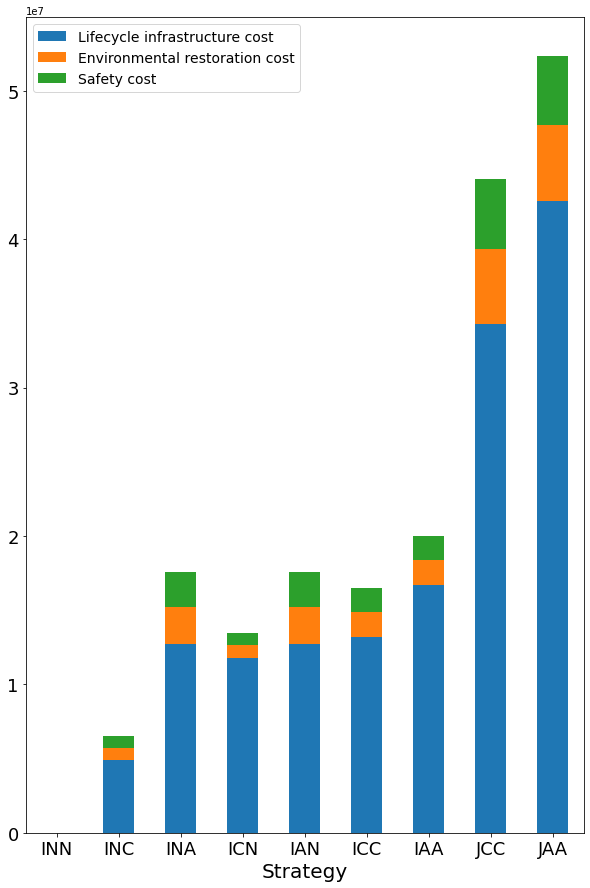

In [109]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)0)

In [66]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [67]:
df_npv_loss_relative

,economic_losses
Strategy,
INN,0.0
INC,0.0
INA,0.0
ICN,-322000000.0
IAN,-620000000.0
JCC,-323000000.0
ICC,-323000000.0
JAA,-622000000.0
IAA,-622000000.0


In [68]:
df_npv_loss_relative=df_npv_loss_relative.reset_index()

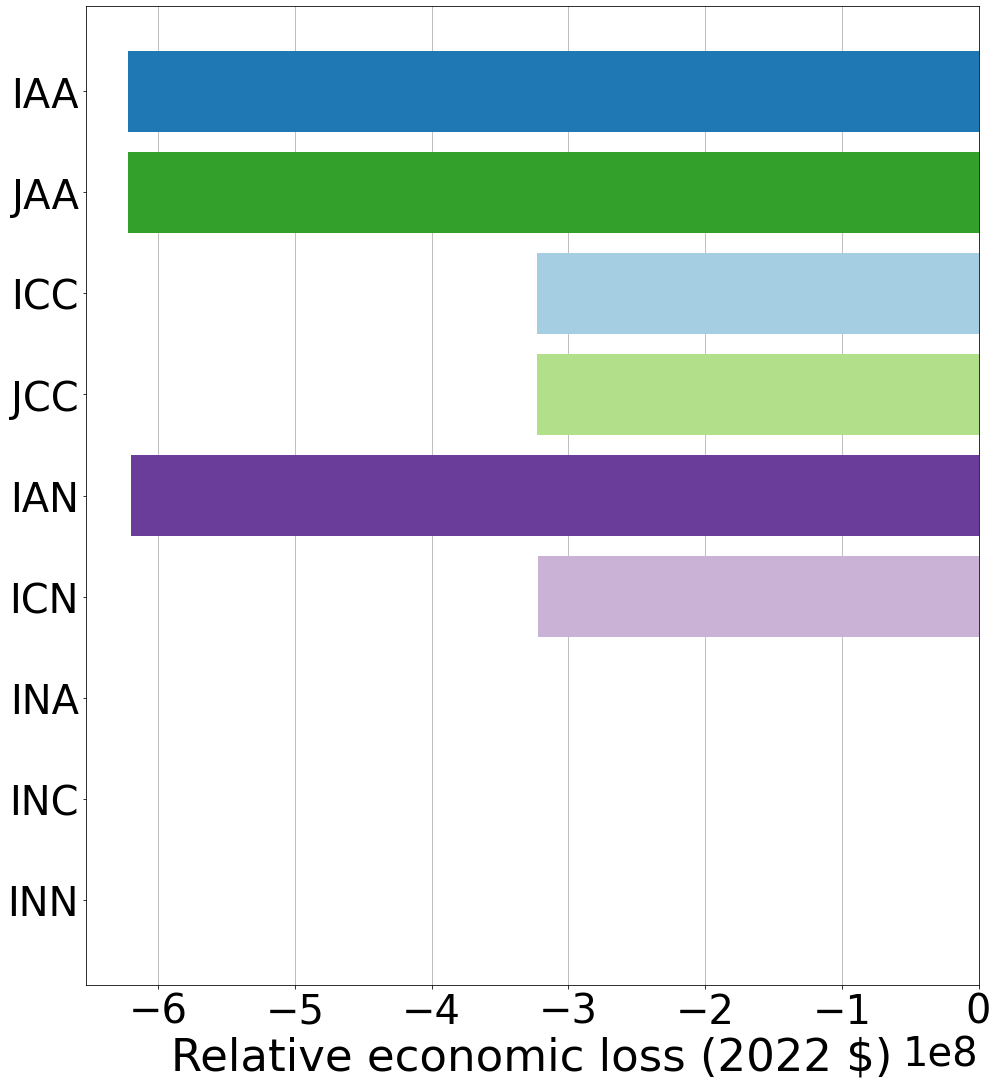

In [71]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(16,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss_relative.loc[i,"economic_losses"],color=row, zorder=3)
plt.xlabel ('Relative economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

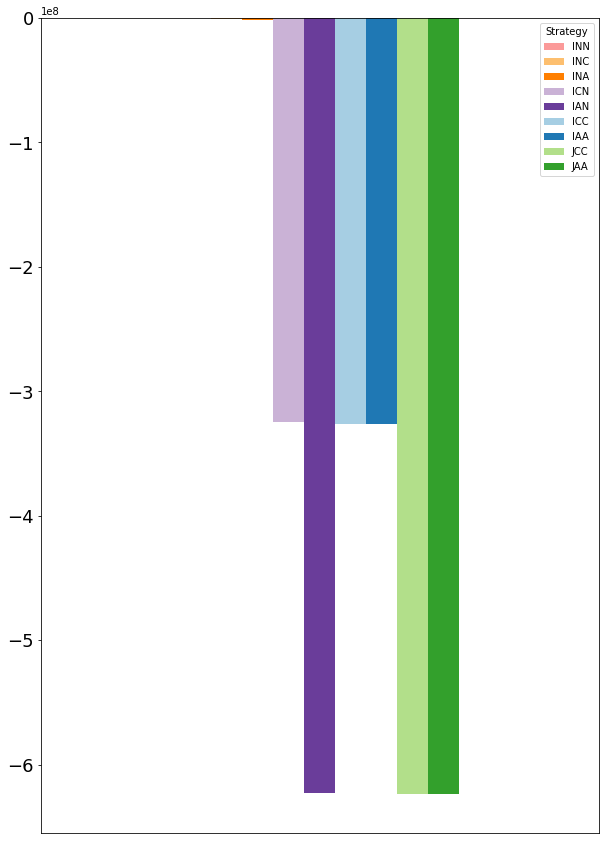

In [169]:
# plotting loss results integerated for broadband and electric
ax=df_npv_loss_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
ax.set_xticks([])
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'INN'),
  Text(1, 0, 'INC'),
  Text(2, 0, 'INA'),
  Text(3, 0, 'ICN'),
  Text(4, 0, 'IAN'),
  Text(5, 0, 'ICC'),
  Text(6, 0, 'IAA'),
  Text(7, 0, 'JCC'),
  Text(8, 0, 'JAA')])

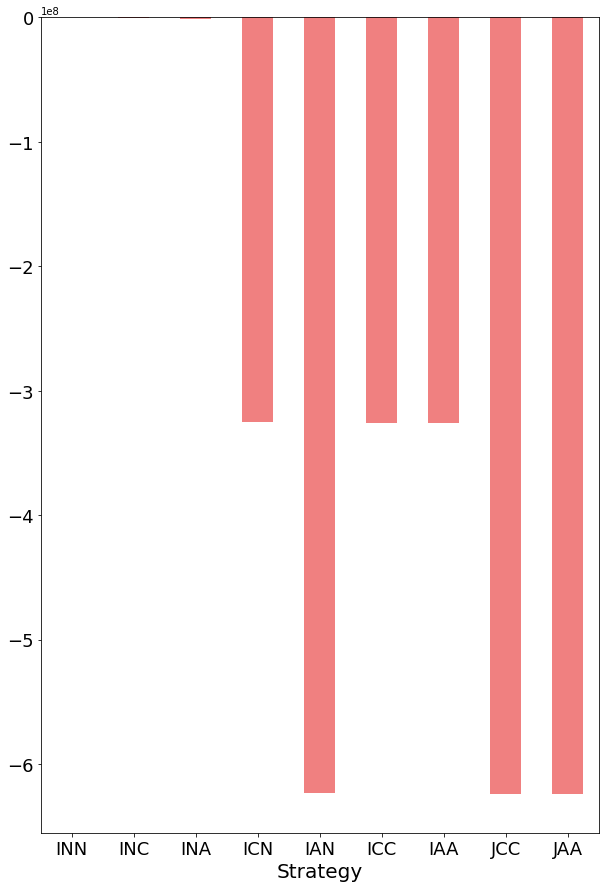

In [122]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

In [72]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

In [73]:
df_npv_benefit_relative=df_npv_benefit_relative.reset_index()

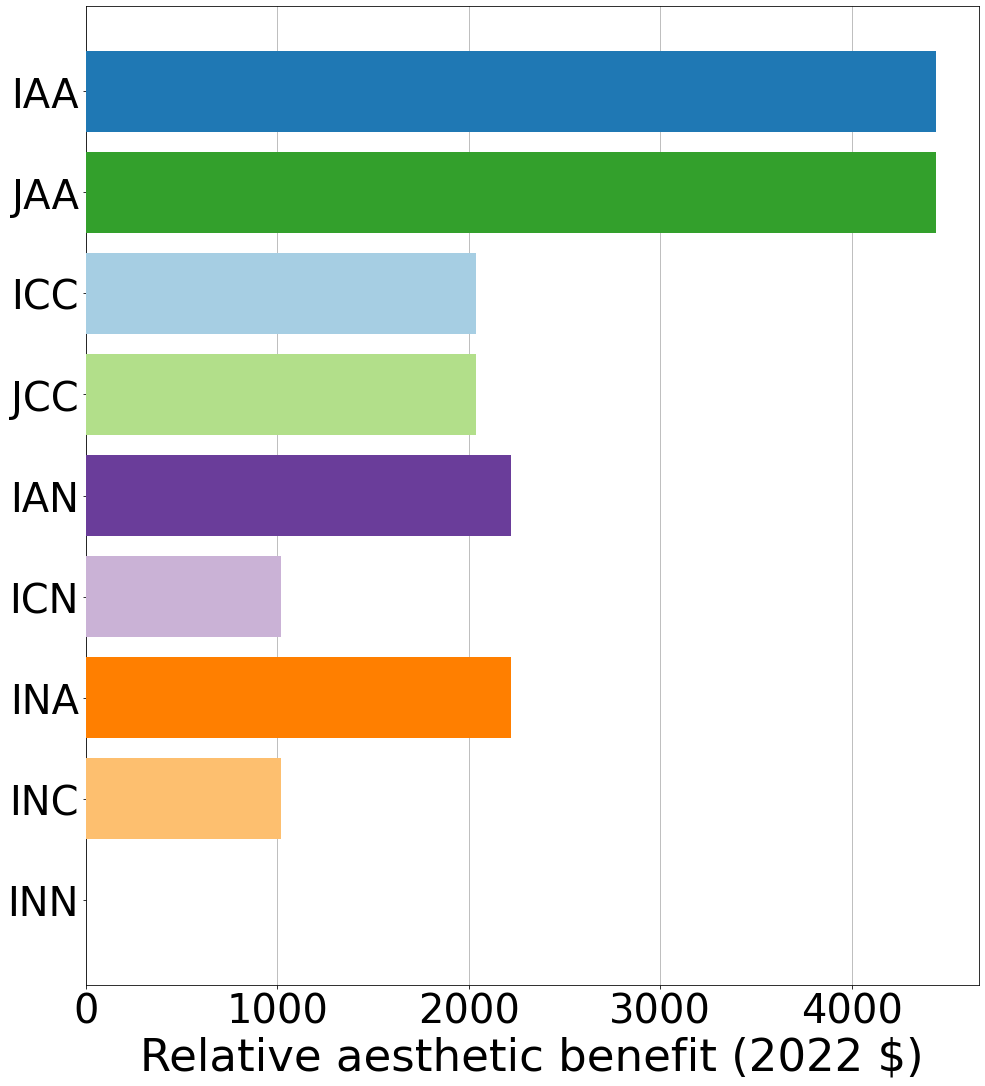

In [74]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(16,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit_relative.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Relative aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

(array([], dtype=float64), [])

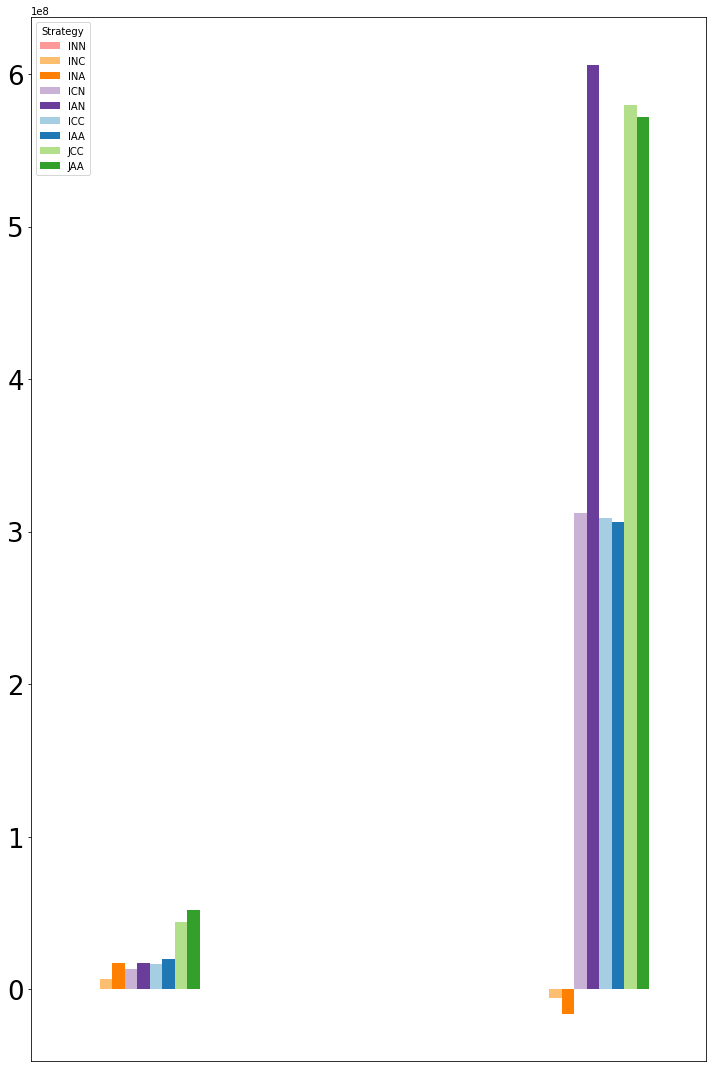

In [497]:
# plotting benefit results integerated for broadband and electric
ax=df_npv_benefit_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
ax.set_xticks([])
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'INN'),
  Text(1, 0, 'INC'),
  Text(2, 0, 'INA'),
  Text(3, 0, 'ICN'),
  Text(4, 0, 'IAN'),
  Text(5, 0, 'ICC'),
  Text(6, 0, 'IAA'),
  Text(7, 0, 'JCC'),
  Text(8, 0, 'JAA')])

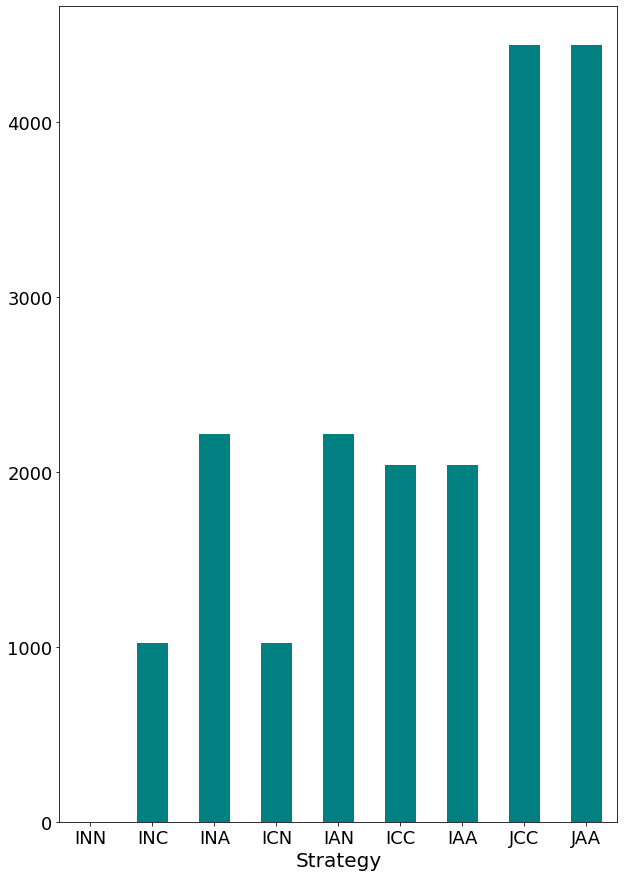

In [125]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)